In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [2]:
start_date = "2010-01-01"
end_date = "2023-02-28"

In [3]:
yf.pdr_override()

df = yf.download("GOOG", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [61]:
df.head()
df.shape

(3310, 2)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3.310000e+03
mean,49.509797,50.015186,49.013125,49.523206,49.523206,5.753472e+07
std,36.302017,36.728217,35.893588,36.311277,36.311277,5.044136e+07
min,10.916831,11.015710,10.800268,10.861040,10.861040,1.584340e+05
25%,20.405390,20.555141,20.339202,20.461057,20.461057,2.602650e+07
50%,38.036499,38.430500,37.672501,38.066750,38.066750,3.707300e+07
75%,62.332623,63.034625,61.886924,62.432501,62.432501,7.802336e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,5.952147e+08


In [6]:
df = df[['Close']]

In [7]:
df.head(4)

,Close
Date,
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037


In [9]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)

C:\Users\chinm\AppData\Local\Temp\ipykernel_7628\3844823444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


In [16]:
df = df.reset_index()

In [21]:
# df = df.drop['Date'].copy()
df = df.drop(['Date'], axis=1)

In [22]:
df

,Close,Prediction
0,15.610239,13.360920
1,15.541497,13.311356
2,15.149715,13.359924
3,14.797037,13.278230
4,14.994298,13.481966
...,...,...
3305,92.050003,NaN
3306,91.800003,NaN
3307,91.070000,NaN
3308,89.349998,NaN


In [35]:
X = np.array(df.drop(['Prediction'],1))

C:\Users\chinm\AppData\Local\Temp\ipykernel_7628\2158571685.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))


In [36]:
X = X

In [37]:
print(X.shape)
X = X[:-future_days]

(3310, 1)


In [38]:
X.shape

(3285, 1)

In [39]:
y = np.array(df['Prediction'])[:-future_days]

In [40]:
y

array([13.36091995, 13.31135559, 13.35992432, ..., 91.06999969,
       89.34999847, 90.09999847])

In [41]:
X

array([[15.61023903],
       [15.54149723],
       [15.14971542],
       ...,
       [91.77999878],
       [93.91000366],
       [99.27999878]])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [43]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [44]:
lr = LinearRegression().fit(x_train, y_train)

In [48]:
#get the last 'x' rows of feature dataset 
x_feature = X[:-future_days]

In [67]:
x_feature = x_feature[-25:]
x_feature

array([[ 88.91000366],
       [ 87.40000153],
       [ 94.16999817],
       [ 96.73000336],
       [ 96.02999878],
       [ 98.72000122],
       [ 98.98999786],
       [ 98.5       ],
       [ 97.80000305],
       [ 95.83000183],
       [ 97.33000183],
       [ 98.81999969],
       [ 97.59999847],
       [ 96.25      ],
       [ 95.44000244],
       [101.44999695],
       [101.27999878],
       [100.83000183],
       [ 99.87000275],
       [ 97.30999756],
       [ 95.15000153],
       [ 93.94999695],
       [ 93.06999969],
       [ 93.55999756],
       [ 95.84999847]])

In [55]:
tree_prediction = tree.predict(x_feature)
print(tree_prediction.shape)
print()

lr_prediction = lr.predict(x_feature)
print(lr_prediction.shape)
print()

(25,)

(25,)



In [56]:
predictions = tree_prediction

In [57]:
valid = df[X.shape[0]:]

In [58]:
valid

,Close,Prediction
3285,101.209999,NaN
3286,99.209999,NaN
3287,96.730003,NaN
3288,99.160004,NaN
3289,100.709999,NaN
3290,97.949997,NaN
3291,99.870003,NaN
3292,101.430000,NaN
3293,108.800003,NaN
3294,105.220001,NaN


In [59]:
valid["Prediction"] = predictions

C:\Users\chinm\AppData\Local\Temp\ipykernel_7628\898096224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"] = predictions


In [60]:
valid

,Close,Prediction
3285,101.209999,95.309998
3286,99.209999,91.199997
3287,96.730003,90.860001
3288,99.160004,89.150002
3289,100.709999,89.629997
3290,97.949997,90.250000
3291,99.870003,88.260002
3292,101.430000,89.809998
3293,108.800003,87.930000
3294,105.220001,99.279999


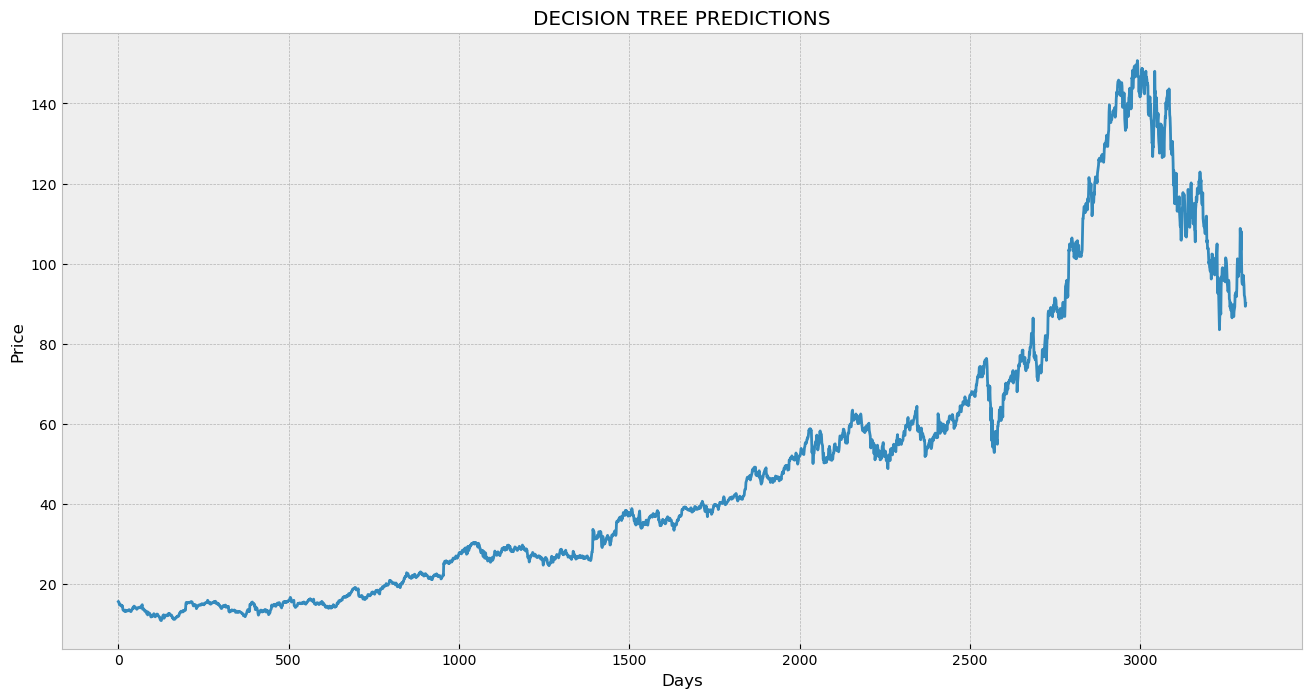

In [62]:
plt.figure(figsize=(16,8))
plt.title("DECISION TREE PREDICTIONS")
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Value','Predicted'])
plt.show()

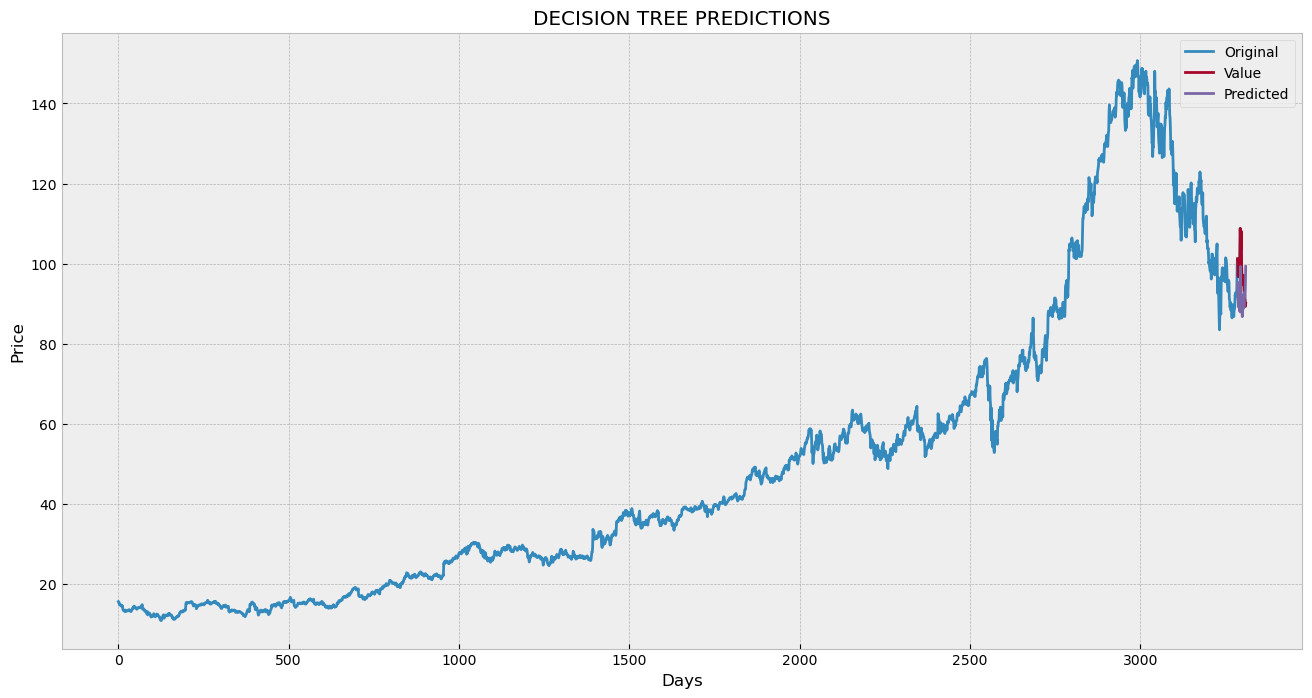

In [63]:
plt.figure(figsize=(16,8))
plt.title("DECISION TREE PREDICTIONS")
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Value','Predicted'])
plt.show()

In [66]:
df[-50:]

,Close,Prediction
3260,95.309998,101.209999
3261,91.199997,99.209999
3262,90.860001,96.730003
3263,89.150002,99.160004
3264,89.629997,100.709999
3265,90.250000,97.949997
3266,88.260002,99.870003
3267,89.809998,101.430000
3268,87.930000,108.800003
3269,86.459999,105.220001


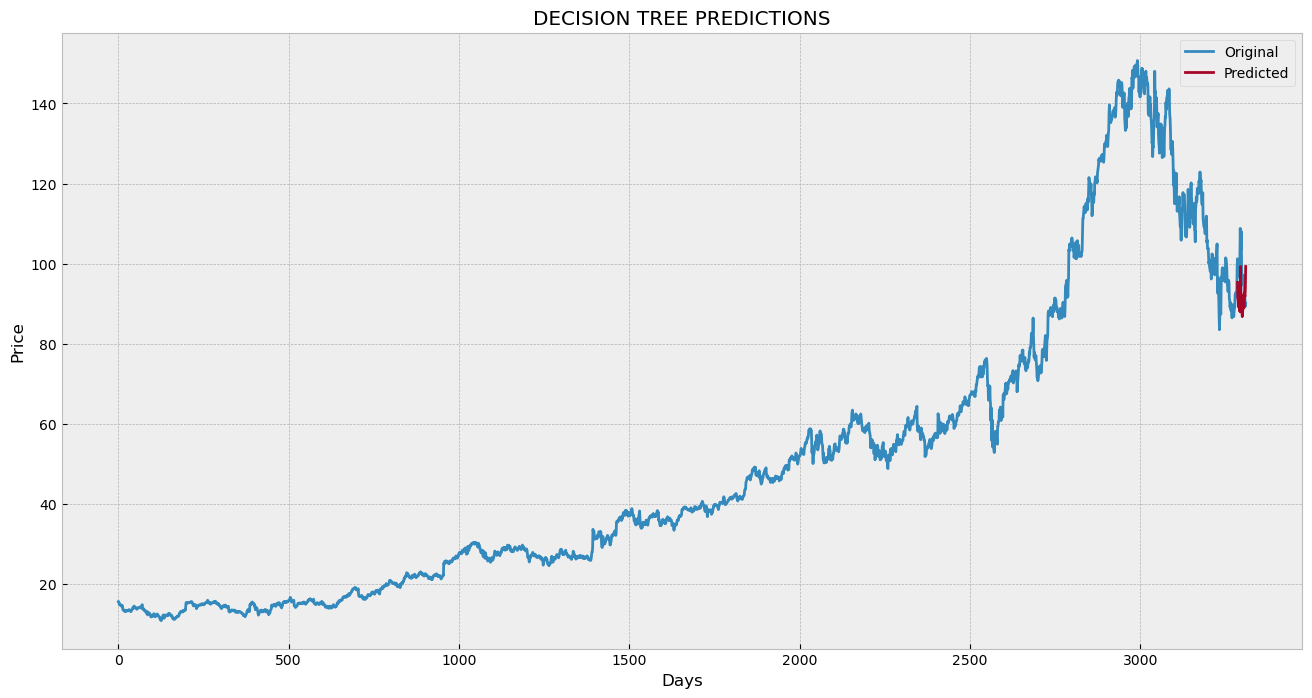

In [65]:
plt.figure(figsize=(16,8))
plt.title("DECISION TREE PREDICTIONS")
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot(df['Close'])
plt.plot(valid[['Prediction']])
plt.legend(['Original','Predicted'])
plt.show()